# LAB 4 - Classification I (Decision Trees)

Submitted by <br>
Name: Parul Joshi <br>
Register Number: 21122041 <br>
Class: MSC DS Sem 2 <br>

## LAB OVERVIEW

### Objectives

- The objective of the 1st dataset that is Titanic is to predict if the people survived or not
- The objective of the 2nd dataset that is loan classification is to predict whether the loan should be provided to the customer or not

### Problem Defination

- Perform Classification using Decision Trees.
- Demonstrate Multiple Datasets, do the necessary EDA and show various evaluation metrics.

### Approach

- Importing necessary libraries.
- Working in 2 two dataset to see the accuracy using decision tree.
- Analyze and exploring datasets.
- Using DecisionTreeClassifier build the model and predict,
- We also check both datasets accuracy score with both gini and entropy.

### Sections

Sections for this lab are -
1. Lab Overview
1. Coding
1. References
1. Conclusion

# CODING

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix,classification_report
from sklearn.metrics import mean_squared_error
from sklearn.metrics import f1_score

# DATASET - 1

# TITANIC

In [2]:
train=pd.read_csv("D:/train.csv")
test=pd.read_csv("D:/test.csv")
print(train)
print(test)

     PassengerId  Survived  Pclass  \
0              1         0       3   
1              2         1       1   
2              3         1       3   
3              4         1       1   
4              5         0       3   
..           ...       ...     ...   
886          887         0       2   
887          888         1       1   
888          889         0       3   
889          890         1       1   
890          891         0       3   

                                                  Name     Sex   Age  SibSp  \
0                              Braund, Mr. Owen Harris    male  22.0      1   
1    Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                               Heikkinen, Miss. Laina  female  26.0      0   
3         Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                             Allen, Mr. William Henry    male  35.0      0   
..                                                 ...     ...   ... 

In [3]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [4]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Name         418 non-null    object 
 3   Sex          418 non-null    object 
 4   Age          332 non-null    float64
 5   SibSp        418 non-null    int64  
 6   Parch        418 non-null    int64  
 7   Ticket       418 non-null    object 
 8   Fare         417 non-null    float64
 9   Cabin        91 non-null     object 
 10  Embarked     418 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 36.0+ KB


In [5]:
df=pd.concat([train,test],sort=False)
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0.0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1.0,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1.0,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1.0,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0.0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
413,1305,NaN,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S
414,1306,NaN,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C
415,1307,NaN,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S
416,1308,NaN,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S


In [6]:
df.shape

(1309, 12)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1309 entries, 0 to 417
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  1309 non-null   int64  
 1   Survived     891 non-null    float64
 2   Pclass       1309 non-null   int64  
 3   Name         1309 non-null   object 
 4   Sex          1309 non-null   object 
 5   Age          1046 non-null   float64
 6   SibSp        1309 non-null   int64  
 7   Parch        1309 non-null   int64  
 8   Ticket       1309 non-null   object 
 9   Fare         1308 non-null   float64
 10  Cabin        295 non-null    object 
 11  Embarked     1307 non-null   object 
dtypes: float64(3), int64(4), object(5)
memory usage: 132.9+ KB


In [8]:
df.isna().sum()

PassengerId       0
Survived        418
Pclass            0
Name              0
Sex               0
Age             263
SibSp             0
Parch             0
Ticket            0
Fare              1
Cabin          1014
Embarked          2
dtype: int64

In [9]:
df["Age"]=df["Age"].fillna(value=df["Age"].median())

In [10]:
df["Survived"]=df["Survived"].fillna(value=df["Survived"].mode())

In [11]:
df['Embarked'] = df['Embarked'].fillna('S')

In [12]:
df['Cabin'] = df['Cabin'].fillna('Missing')
df['Cabin'] = df['Cabin'].str[0]
df['Cabin'].value_counts()

M    1014
C      94
B      65
D      46
E      41
A      22
F      21
G       5
T       1
Name: Cabin, dtype: int64

In [13]:
df.dropna(inplace=True)

In [14]:
df.isna().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Cabin          0
Embarked       0
dtype: int64

In [15]:
df.shape

(892, 12)

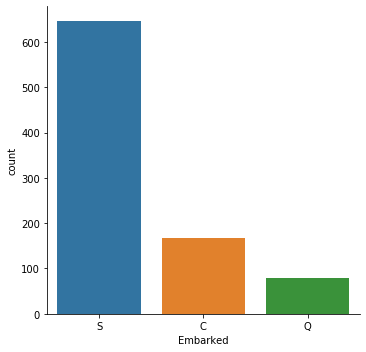

In [17]:
sns.catplot(x = 'Embarked', kind = 'count', data = df)

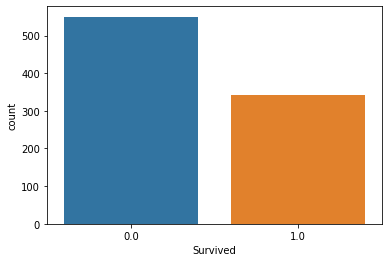

In [18]:
sns.countplot(x='Survived', data=df)

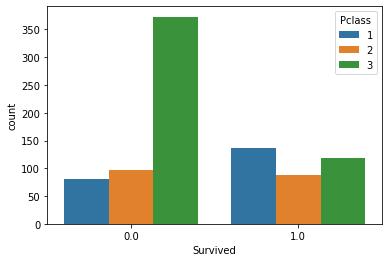

In [19]:
sns.countplot(x='Survived',hue='Pclass', data=df)

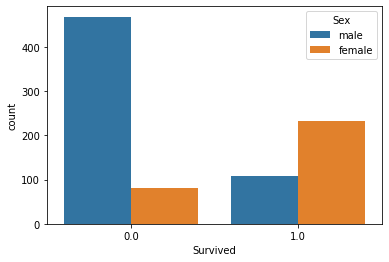

In [20]:
sns.countplot(x='Survived',hue='Sex', data=df)

In [21]:
df.Sex=df.Sex.map({'female':0, 'male':1})
df.Embarked=df.Embarked.map({'S':0, 'C':1, 'Q':2, 'nan':'NaN'})

In [22]:
df.drop('Cabin',axis=1,inplace=True)

In [23]:
df.drop('Name',axis=1,inplace=True)
df.drop('Ticket',axis=1,inplace=True)

In [24]:
df

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,1,0.0,3,1,22.0,1,0,7.2500,0
1,2,1.0,1,0,38.0,1,0,71.2833,1
2,3,1.0,3,0,26.0,0,0,7.9250,0
3,4,1.0,1,0,35.0,1,0,53.1000,0
4,5,0.0,3,1,35.0,0,0,8.0500,0
...,...,...,...,...,...,...,...,...,...
887,888,1.0,1,0,19.0,0,0,30.0000,0
888,889,0.0,3,0,28.0,1,2,23.4500,0
889,890,1.0,1,1,26.0,0,0,30.0000,1
890,891,0.0,3,1,32.0,0,0,7.7500,2


In [25]:
x=df.drop('Survived',axis=1)
y=df['Survived']

In [26]:
X_train, X_test, y_train, y_test = train_test_split(x,y,test_size=0.22,random_state=42)

In [27]:
dt=DecisionTreeClassifier()

In [28]:
dt.fit(X_train, y_train)
predictions = dt.predict(X_test)

In [29]:
from sklearn.metrics import accuracy_score

In [30]:
print("f1 score is:" ,f1_score(y_test,predictions))
print("\n Confusion Matrix is: \n",confusion_matrix(y_test,predictions))
print("\n Classification Report is:\n" ,classification_report(y_test,predictions))
print ("\n Accuracy : ", accuracy_score(y_test, predictions))

f1 score is: 0.7471264367816093

 Confusion Matrix is: 
 [[88 17]
 [27 65]]

 Classification Report is:
               precision    recall  f1-score   support

         0.0       0.77      0.84      0.80       105
         1.0       0.79      0.71      0.75        92

    accuracy                           0.78       197
   macro avg       0.78      0.77      0.77       197
weighted avg       0.78      0.78      0.78       197


 Accuracy :  0.7766497461928934


WITH ENTROPY

In [69]:
clf_entropy = DecisionTreeClassifier(criterion='entropy',max_depth=2,random_state=42)
clf_entropy.fit(X_train, y_train)
y_pred = clf_entropy.predict(X_test)
print("Confusion Matrix:\n ", confusion_matrix(y_test, y_pred))
print ("\n Accuracy : ", accuracy_score(y_test,y_pred)*100)
print("\n Classification Report : \n", classification_report(y_test, y_pred))

Confusion Matrix:
  [[101   4]
 [ 41  51]]

 Accuracy :  77.15736040609137

 Classification Report : 
               precision    recall  f1-score   support

         0.0       0.71      0.96      0.82       105
         1.0       0.93      0.55      0.69        92

    accuracy                           0.77       197
   macro avg       0.82      0.76      0.76       197
weighted avg       0.81      0.77      0.76       197



WITH GINI

In [70]:
clf_gini = DecisionTreeClassifier(criterion='gini',max_depth=2,random_state=42)
clf_gini.fit(X_train, y_train)
y_pred = clf_gini.predict(X_test)

print("Confusion Matrix:\n ", confusion_matrix(y_test, y_pred))

print ("\n Accuracy : ", accuracy_score(y_test,y_pred)*100)

print("\n Classification Report :\n ", classification_report(y_test, y_pred))

Confusion Matrix:
  [[101   4]
 [ 41  51]]

 Accuracy :  77.15736040609137

 Classification Report :
                precision    recall  f1-score   support

         0.0       0.71      0.96      0.82       105
         1.0       0.93      0.55      0.69        92

    accuracy                           0.77       197
   macro avg       0.82      0.76      0.76       197
weighted avg       0.81      0.77      0.76       197



# DATASET - 2

# LOAN DATASET

In [31]:
#importing the csv file
ln=pd.read_csv("loan.csv")

In [32]:
ln

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,LP002978,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,Y
610,LP002979,Male,Yes,3+,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,Y
611,LP002983,Male,Yes,1,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,Y
612,LP002984,Male,Yes,2,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban,Y


In [33]:
ln.dtypes

Loan_ID               object
Gender                object
Married               object
Dependents            object
Education             object
Self_Employed         object
ApplicantIncome        int64
CoapplicantIncome    float64
LoanAmount           float64
Loan_Amount_Term     float64
Credit_History       float64
Property_Area         object
Loan_Status           object
dtype: object

In [34]:
ln.shape

(614, 13)

In [35]:
ln.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


In [36]:
ln.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [37]:
cols = ["Gender", "Married","Dependents","Self_Employed"]
ln[cols]=ln[cols].fillna(ln.mode().iloc[0])

In [38]:
cols = ["LoanAmount", "Loan_Amount_Term","Credit_History"]
ln[cols]=ln[cols].fillna(ln.mean().iloc[0])

In [39]:
ln.isnull().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

In [40]:
#describing the dataset
ln.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,614.000000,614.000000,614.000000
mean,5403.459283,1621.245798,334.775414,457.407866,440.794730
std,6109.041673,2926.248369,981.515962,758.873005,1478.816648
min,150.000000,0.000000,9.000000,12.000000,0.000000
25%,2877.500000,0.000000,100.250000,360.000000,1.000000
50%,3812.500000,1188.500000,129.000000,360.000000,1.000000
75%,5795.000000,2297.250000,175.000000,360.000000,1.000000
max,81000.000000,41667.000000,5403.459283,5403.459283,5403.459283


In [41]:
#checking the correlation 
ln.cor=ln.corr()
ln.cor

C:\Users\parul\anaconda3\lib\site-packages\ipykernel_launcher.py:2: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  


,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
ApplicantIncome,1.000000,-0.116605,0.047713,-0.035559,-0.034654
CoapplicantIncome,-0.116605,1.000000,-0.021724,0.000674,0.104296
LoanAmount,0.047713,-0.021724,1.000000,-0.034605,-0.020906
Loan_Amount_Term,-0.035559,0.000674,-0.034605,1.000000,-0.046005
Credit_History,-0.034654,0.104296,-0.020906,-0.046005,1.000000


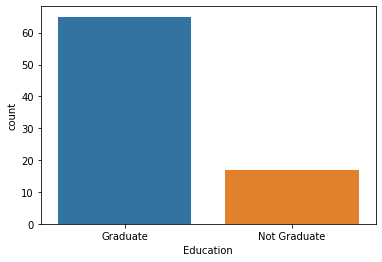

In [43]:
sns.countplot(x="Education",data=ln.loc[ln["Self_Employed"]=="Yes"])
plt.show()
#from the below graph we can see that more self_employed person are graduated

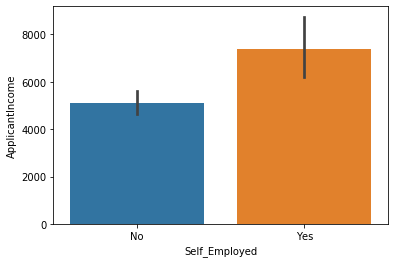

In [44]:
sns.barplot(y="ApplicantIncome",x="Self_Employed",data=ln)
plt.show()

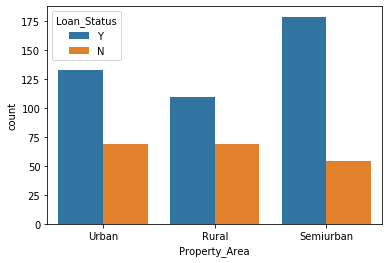

In [45]:
sns.countplot(x="Property_Area",hue="Loan_Status",data=ln)
plt.show()

{'bodies': [<matplotlib.collections.PolyCollection at 0x212038c0708>],
 'cmaxes': <matplotlib.collections.LineCollection at 0x212038e4688>,
 'cmins': <matplotlib.collections.LineCollection at 0x212038a7888>,
 'cbars': <matplotlib.collections.LineCollection at 0x212038c05c8>}

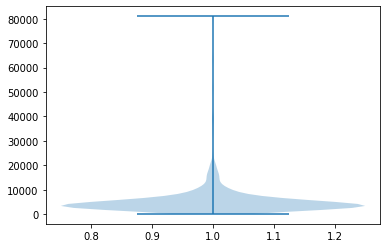

In [46]:
plt.violinplot(ln['ApplicantIncome'])

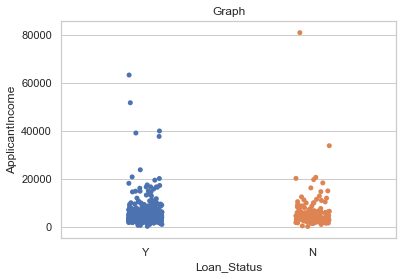

In [47]:
sns.set(style="whitegrid")
ax=sns.stripplot(x='Loan_Status',y='ApplicantIncome',data=ln);
plt.title('Graph')
plt.show()

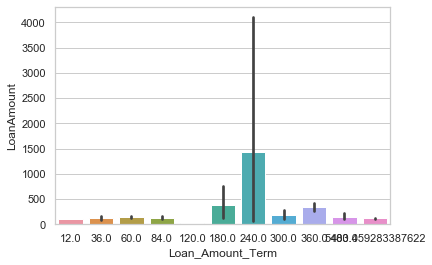

In [48]:
sns.barplot(x='Loan_Amount_Term',y='LoanAmount',data=ln)

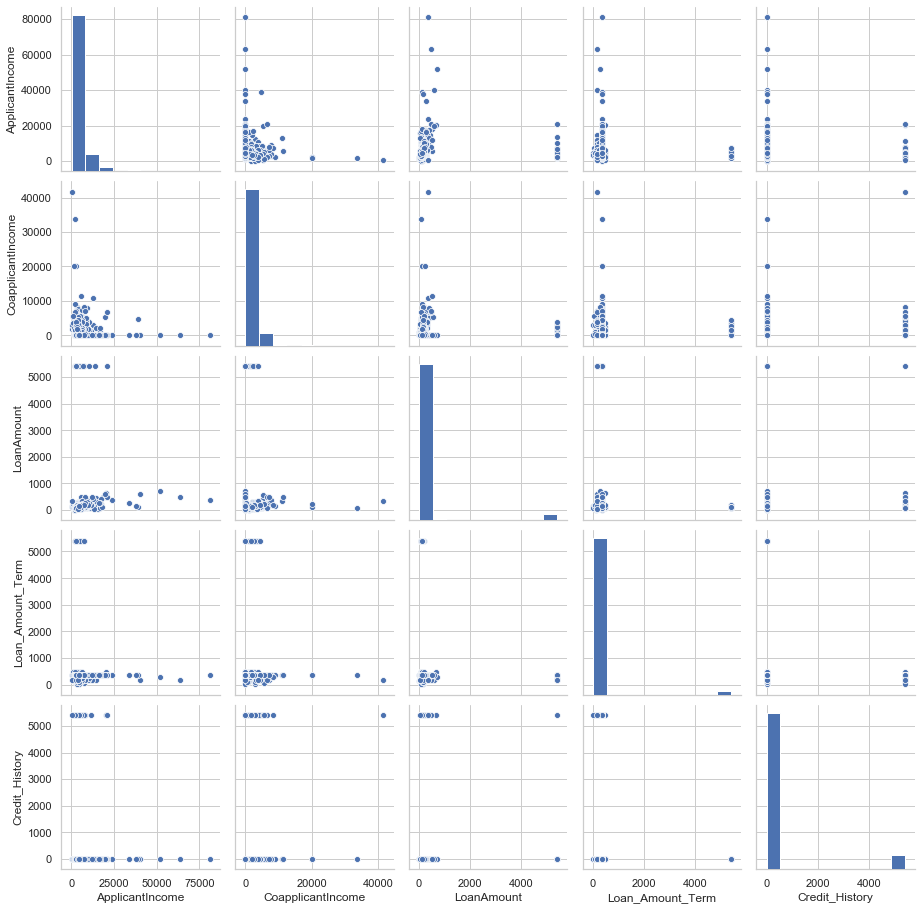

In [49]:
sns.pairplot(ln)

In [51]:
x_1=ln.drop(columns=["Loan_Status"])
y_1=ln[["Loan_Status"]]

In [52]:
#checking of skewness
ln.skew()

ApplicantIncome      6.539513
CoapplicantIncome    7.491531
LoanAmount           4.949384
Loan_Amount_Term     6.335646
Credit_History       3.068326
dtype: float64

In [53]:
for index in x_1.skew().index:
    if x_1.skew().loc[index]>0.5:
        x_1[index]=np.log1p(x_1[index])

In [54]:
x_1.skew()

ApplicantIncome      0.482128
CoapplicantIncome   -0.173073
LoanAmount           2.536007
Loan_Amount_Term     2.169977
Credit_History       2.999597
dtype: float64

In [55]:
x_1.drop(columns=["Loan_ID"],inplace=True)

In [56]:
x_1=pd.get_dummies(x_1,drop_first=True)

In [57]:
x_1

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Gender_Male,Married_Yes,Dependents_1,Dependents_2,Dependents_3+,Education_Not Graduate,Self_Employed_Yes,Property_Area_Semiurban,Property_Area_Urban
0,8.674197,0.000000,8.594980,5.888878,0.693147,1,0,0,0,0,0,0,0,1
1,8.430327,7.319202,4.859812,5.888878,0.693147,1,1,1,0,0,0,0,0,0
2,8.006701,0.000000,4.204693,5.888878,0.693147,1,1,0,0,0,0,1,0,1
3,7.857094,7.765993,4.795791,5.888878,0.693147,1,1,0,0,0,1,0,0,1
4,8.699681,0.000000,4.955827,5.888878,0.693147,1,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,7.972811,0.000000,4.276666,5.888878,0.693147,0,0,0,0,0,0,0,0,0
610,8.320448,0.000000,3.713572,5.198497,0.693147,1,1,0,0,1,0,0,0,0
611,8.996280,5.484797,5.537334,5.888878,0.693147,1,1,1,0,0,0,0,0,1
612,8.933796,0.000000,5.236442,5.888878,0.693147,1,1,0,1,0,0,0,0,1


In [58]:
y_1

,Loan_Status
0,Y
1,N
2,Y
3,Y
4,Y
...,...
609,Y
610,Y
611,Y
612,Y


In [59]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
le.fit(y_1)
y_1=le.transform(y_1)
y_1

C:\Users\parul\anaconda3\lib\site-packages\sklearn\preprocessing\_label.py:235: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\parul\anaconda3\lib\site-packages\sklearn\preprocessing\_label.py:268: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


array([1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1,
       0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1,
       1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0,
       0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1,
       1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1,
       1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0,
       1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1,
       1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1,
       1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 1, 0, 1,
       0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0,
       1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1,
       1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1,
       0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 0,

In [60]:
from sklearn.preprocessing import StandardScaler
scx=StandardScaler()
x_1=scx.fit_transform(x_1)
x_1

array([[ 0.51618627, -1.10778298,  4.23445944, ..., -0.39260074,
        -0.7820157 ,  1.42814704],
       [ 0.13780585,  0.78215757, -0.16503206, ..., -0.39260074,
        -0.7820157 , -0.70020801],
       [-0.51947937, -1.10778298, -0.93666923, ...,  2.54711697,
        -0.7820157 ,  1.42814704],
       ...,
       [ 1.01592074,  0.30848337,  0.63299155, ..., -0.39260074,
        -0.7820157 ,  1.42814704],
       [ 0.91897195, -1.10778298,  0.27858356, ..., -0.39260074,
        -0.7820157 ,  1.42814704],
       [ 0.13780585, -1.10778298, -0.12024124, ...,  2.54711697,
         1.2787467 , -0.70020801]])

In [61]:
y_1.shape

(614,)

In [62]:
X_1_train, X_1_test, y_1_train, y_1_test = train_test_split(x_1,y_1,test_size=0.22,random_state=42)

In [63]:
dt=DecisionTreeClassifier()

In [64]:
dt.fit(X_1_train, y_1_train)
predictions = dt.predict(X_1_test)

In [65]:
print("f1 score is:" ,f1_score(y_1_test,predictions))
print("\n Confusion Matrix is: \n",confusion_matrix(y_1_test,predictions))
print("\n Classification Report is:\n" ,classification_report(y_1_test,predictions))
print ("\n Accuracy : ", accuracy_score(y_1_test, predictions))

f1 score is: 0.7578947368421053

 Confusion Matrix is: 
 [[18 30]
 [16 72]]

 Classification Report is:
               precision    recall  f1-score   support

           0       0.53      0.38      0.44        48
           1       0.71      0.82      0.76        88

    accuracy                           0.66       136
   macro avg       0.62      0.60      0.60       136
weighted avg       0.64      0.66      0.65       136


 Accuracy :  0.6617647058823529


WITH ENTROPY

In [71]:
clf_entropy = DecisionTreeClassifier(criterion='entropy',max_depth=2,random_state=42)
clf_entropy.fit(X_1_train, y_1_train)
y_1_pred = clf_entropy.predict(X_1_test)
print("Confusion Matrix:\n ", confusion_matrix(y_1_test, y_1_pred))
print ("\n Accuracy : ", accuracy_score(y_1_test,y_1_pred)*100)
print("\n Classification Report : \n", classification_report(y_1_test, y_1_pred))

Confusion Matrix:
  [[20 28]
 [ 2 86]]

 Accuracy :  77.94117647058823

 Classification Report : 
               precision    recall  f1-score   support

           0       0.91      0.42      0.57        48
           1       0.75      0.98      0.85        88

    accuracy                           0.78       136
   macro avg       0.83      0.70      0.71       136
weighted avg       0.81      0.78      0.75       136



WITH GINI

In [72]:
clf_gini = DecisionTreeClassifier(criterion='gini',max_depth=2,random_state=42)
clf_gini.fit(X_1_train, y_1_train)
y_1_pred = clf_gini.predict(X_1_test)
print("Confusion Matrix:\n ", confusion_matrix(y_1_test, y_1_pred))
print ("\n Accuracy : ", accuracy_score(y_1_test,y_1_pred))
print("\n Classification Report :\n ", classification_report(y_1_test, y_1_pred))

Confusion Matrix:
  [[20 28]
 [ 2 86]]

 Accuracy :  0.7794117647058824

 Classification Report :
                precision    recall  f1-score   support

           0       0.91      0.42      0.57        48
           1       0.75      0.98      0.85        88

    accuracy                           0.78       136
   macro avg       0.83      0.70      0.71       136
weighted avg       0.81      0.78      0.75       136



## References

- https://www.kaggle.com/code/anjusunilkumar/titanic-dataset-prediction
- https://www.kaggle.com/code/funxexcel/titanic-basic-solution-using-adaboost
- https://www.tutorialspoint.com/python-remove-the-missing-nan-values-in-the-dataframe

## CONCLUSION

We can conclude below things from this lab -:
    - After giving the criteria that is Gini and Entropy the model works better 
    - Decision tree goal is to create a model that predicts the value of a target variable by learning simple decision rules inferred from the data features.
    - The tree creates a visual representation of all possible outcomes, rewards and follow-up decisions in one document.